# 05 微分可能函数

黒木玄

2018-04-20

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/05%20differentiable%20functions.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Landau記号" data-toc-modified-id="Landau記号-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Landau記号</a></span><ul class="toc-item"><li><span><a href="#数列版" data-toc-modified-id="数列版-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数列版</a></span></li><li><span><a href="#連続版" data-toc-modified-id="連続版-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>連続版</a></span></li></ul></li><li><span><a href="#Laudau記号を使った微分可能性の定義" data-toc-modified-id="Laudau記号を使った微分可能性の定義-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Laudau記号を使った微分可能性の定義</a></span><ul class="toc-item"><li><span><a href="#連続函数" data-toc-modified-id="連続函数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>連続函数</a></span></li><li><span><a href="#微分可能函数" data-toc-modified-id="微分可能函数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>微分可能函数</a></span></li><li><span><a href="#$C^n$-級函数" data-toc-modified-id="$C^n$-級函数-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$C^n$ 級函数</a></span></li></ul></li><li><span><a href="#微分の基本性質" data-toc-modified-id="微分の基本性質-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>微分の基本性質</a></span><ul class="toc-item"><li><span><a href="#Leibnitz則" data-toc-modified-id="Leibnitz則-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Leibnitz則</a></span></li><li><span><a href="#合成函数の微分則" data-toc-modified-id="合成函数の微分則-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>合成函数の微分則</a></span></li></ul></li><li><span><a href="#平均値の定理" data-toc-modified-id="平均値の定理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>平均値の定理</a></span><ul class="toc-item"><li><span><a href="#Rolleの定理" data-toc-modified-id="Rolleの定理-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Rolleの定理</a></span></li><li><span><a href="#微分可能函数の平均値の定理" data-toc-modified-id="微分可能函数の平均値の定理-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>微分可能函数の平均値の定理</a></span></li><li><span><a href="#$C^1$-級函数の積分版平均値の定理" data-toc-modified-id="$C^1$-級函数の積分版平均値の定理-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>$C^1$ 級函数の積分版平均値の定理</a></span></li><li><span><a href="#Cauchyの平均値の定理" data-toc-modified-id="Cauchyの平均値の定理-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Cauchyの平均値の定理</a></span></li></ul></li><li><span><a href="#極限の微分・積分の順序交換" data-toc-modified-id="極限の微分・積分の順序交換-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>極限の微分・積分の順序交換</a></span><ul class="toc-item"><li><span><a href="#極限と積分の順序交換" data-toc-modified-id="極限と積分の順序交換-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>極限と積分の順序交換</a></span></li><li><span><a href="#極限と微分の順序交換" data-toc-modified-id="極限と微分の順序交換-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>極限と微分の順序交換</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## Landau記号

### 数列版

数列 $a_n,b_n$ について

$$
\frac{a_n}{b_n}\to 0 \quad (n\to\infty)
$$

が成立するとき, 量 $a_n$ を $o(b_n)$ と書くことがある:

$$
a_n = o(b_n).
$$

例えば

* $n = o(n^2)$.

* $n^{100} = o(e^n)$.

* $\log n = o(n)$.

ある非負の定数 $M$ が存在して, 十分大きな $n$ について 

$$
|a_n| \leqq M |b_n|
$$

が成立するとき, 量 $a_n$ を $O(b_n)$ と書くことがある:

$$
a_n = O(b_n).
$$

例えば

* $3n^2 + 100n + 26 = O(n^2)$.

* $\ds n\log n - n + \frac{1}{2}\log(2\pi n) = O(n\log n)$.

以上で定義した $o(b_n)$ と $O(b_n)$ を**Landau記号**と呼ぶ. 

違うものを同じLandau記号の $o(b_n)$ や $O(b_n)$ で表すことのがあるので注意しなければいけない. 例えば $O(n)-O(n)=0$ とはならず, $O(n)-O(n)=O(n)$ となる.

$o(b_n)$ の量は $O(b_n)$ の量にもなる. 

**問題:** $n\to\infty$ のとき $a_n/b_n$ が収束するならば $a_n=O(b_n)$ であることを示せ.

**解答例:** $a_n/b_n$ が $C$ に収束しているなら, $|a_n/b_n|$ は $|C|$ に収束するので, $M=|C|+1$ とおくと, 十分大きな $n$ について $|a_n/b_n|\leqq |C|+1 = M$ すなわち $|a_n|\leqq M|b_n|$ が成立する. $\QED$ 

### 連続版

$x\to\infty$ におけるLandau記号 $o(g(x))$, $O(g(x))$ は上の数列の場合と同様に定義される.

有限の $a$ に関する $x\to a$ におけるLandau記号 $o(g(x))$, $O(g(x))$ も同様に定義される.  

$$
\frac{f(x)}{g(x)}\to 0 \quad (x\to a)
$$

が成立するとき, $f(x)=o(g(x))$ と書き, ある非負の定数 $M$ とある $\delta > 0$ が存在して

$$
|f(x)| \leqq M |g(x)| \quad (|x-a|\leqq\delta)
$$

が成立するとき, $f(x)=O(g(x))$ と書く.

例えば, 

* $x\to 0$ において $x\log x\to 0$ なので

$$
x = o(1/\log x), \quad \log x = o(1/x) \quad (x\to 0).
$$

* $x\to a$ において, 

$$
(x-a)^2 + (x-a)^3 + (x-a)^4 + \cdots = O\left((x-a)^2\right) = o(x-a) \quad (x\to a).
$$

* どんなに大きな $n$ についても, $x\searrow 0$ において $e^{-1/x}/x^n\to 0$ なので

$$
\exp\left(-\frac{1}{x}\right) = o(x^n) \quad(x\searrow 0).
$$

**問題:** 以上に出て来た例を確認(証明)せよ. さらに以上に出て来ていない例で面白そうなものを自分で作れ. $\QED$

## Laudau記号を使った微分可能性の定義

### 連続函数

函数 $f(x)$ が $x$ において連続であることの定義は, Landau記号を使うと

$$
f(x+h) = f(x) + o(1) \quad (h\to 0)
$$

と書ける. $o(1)$ は $h\to 0$ で $0$ に収束する項を意味する.

### 微分可能函数

函数 $f(x)$ が $x$ において微分可能であることの定義は, ある $f'(x)$ が存在して, 

$$
\frac{f(x+h) - f(x)}{h} \to f'(x) \quad (h\to 0)
$$

が成立することである. この条件はLandau記号を使うと, 

$$
f(x+h) = f(x) + f'(x)h + o(h)
$$

と書き直される. ここで $o(h)$ は $h\to 0$ のとき $o(h)/h\to 0$ となるような量を意味する. $o(h)$ を $h$ より**高次の微小量**と呼ぶことがある.

以上をまとめると,

**連続性:** $\quad$ $f(x+h) = f(x) + o(1)$ $(h\to 0)$.

**微分可能性:** $\quad$ $f(x+h) = f(x) + f'(x)h + o(h)$ $(h\to 0)$.

このように書けばこれらは

$$
f(x+h) = a_0 + a_1 h + a_2 h + \cdots + a_k h^k + o(h^k)
$$

の形に一般化可能であることが明瞭になる. 後で実際にこの一般化を実行する(Taylorの定理).

### $C^n$ 級函数

連続函数を **$C^0$ 級**函数と呼ぶ.

函数 $f$ が微分可能でかつ導函数が連続なとき $f$ は **$C^1$ 級**であるという. そのとき $f$ は**連続微分可能**であると言うこともある.

より一般に, $f$ が $n$ 回微分可能でかつその $n$ 階の導函数 $f^{(n)}$ が連続なとき, $f$ は **$C^n$ 級**であるという.

任意有限回微分可能な函数を **$C^\infty$ 級函数**と呼ぶ.

$C^n$ 級函数(class-$C^n$ function)を **$C^n$ 函数** ($C^n$-function) と呼ぶことも多い.

**問題:** 微分可能だが $C^1$ 級でない函数の例を挙げよ.

**解答例:** 函数 $f$ を

$$
f(x) = \begin{cases}
x^2 \sin(1/x) & (x\ne 0) \\
0 & (x=0)
\end{cases}
$$

と定める. このとき, $x\ne 0$ ならば $f'(x)=2x\sin(1/x)-\cos(1/x)$ である. そして, $x\to 0$ のとき

$$
\frac{f(x)-f(0)}{x-0}=\frac{x^2\sin(1/x)}{x}=x\sin(1/x)\to 0
$$

なので, $f$ は $x=0$ でも微分可能であり, $f'(0)=0$ である. これで $f$ が微分可能であることがわかった. しかし, $x\to 0$ で $f'(x)$ の中の $\cos(1/x)$ が無限に振動して収束しないので, $f'$ は $x=0$ で不連続である. これで $f$ は $C^1$ 級ではないことがわかった. $\QED$

**問題:** 上の問題の $x^2\sin(1/x)$ を非負の整数 $n$ に対する $x^n\sin(1/x)$ で置き換えた場合について考えてみよ. その場合に得らえる函数は何回微分可能であるか? 最大回数の微分の結果得られる導函数は連続であるか? まず, $n=0,1,3,4$ の場合について考えてみよ. $\QED$

解答例略.

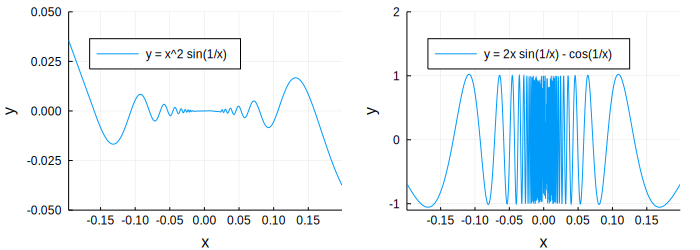

In [2]:
f(x) = x == 0 ? 0 : x^2*sin(1/x)
g(x) = x == 0 ? 0 : 2x*sin(1/x) - cos(1/x)

p1 = plot(size=(400, 250), xlabel="x", ylabel="y", legend=:topleft)
plot!(f, -0.2, 0.2, ylims=(-0.05, 0.05), label="y = x^2 sin(1/x)")

p2 = plot(size=(400, 250), xlabel="x", ylabel="y", legend=:topleft)
plot!(g, -0.2, 0.2, ylims=(-1.1, 2.0), label="y = 2x sin(1/x) - cos(1/x)")

plot(p1, p2, size=(700, 250))

## 微分の基本性質

### Leibnitz則

微分可能な函数 $f(x)$, $g(x)$ の積 $h(x)=f(x)g(x)$ も微分可能であり, 

$$
h'(x) = f'(x) g(x) + f(x) g'(x).
$$

**証明:** $f,g$ は微分可能なので, 

$$
\begin{aligned}
&
f(x+h) = f(x) + f'(x)h + \eps(h)h, \qquad \eps(h)\to 0 \quad (h\to 0),
\\ &
g(x+h) = g(x) + g'(x)h + \delta(h)h, \qquad \delta(h)\to 0 \quad (h\to 0)
\end{aligned}
$$

と書ける. ゆえに

$$
\begin{aligned}
&
h(x+h) = f(x+h)g(x+h) = f(x)g(x) + (f'(x)g(x)+f(x)g'(x))h + \eta(h)h,
\\ &
\eta(h) = f'(x)g'(x)h + (f(x)+f'(x)h)\delta(h) + (g(x)+g'(x)h)\eps(h) + \eps(h)\delta(h)h
\end{aligned}
$$

となることを確認できる.  そして, $h\to 0$ のとき $\eta(h)\to 0$ なので, $h$ も微分可能で $h'(x)=f'(x)g(x)+f(x)g'(x)$ となることがわかる. $\QED$

**問題:** 部分可能な函数 $f,g$ について

$$
\left(\frac{d}{dx}\right)^n(f(x)g(x))
=\sum_{k=0}^n \binom{n}{k} f^{(k)}(x) g^{(n-k)}(x)
$$

となることを示せ.

**解法1:** $n$ に関する帰納法. $\QED$

**解法2:** 二項定理より, 

$$
\left(\frac{\partial}{\partial x}+\frac{\partial}{\partial y}\right)^n
= \sum_{k=0}^n \binom{n}{k}
\left(\frac{\partial}{\partial x}\right)^k 
\left(\frac{\partial}{\partial y}\right)^{n-k} 
$$

より, これを $f(x)g(y)$ に作用させると, 

$$
\left(\frac{\partial}{\partial x}+\frac{\partial}{\partial y}\right)^n(f(x)g(y))
=\sum_{k=0}^n \binom{n}{k} f^{(k)}(x) g^{(n-k)}(y).
$$

以上において $y=x$ と置けば欲しい結果が得られる. $\QED$

### 合成函数の微分則

微分可能な函数 $f(y)$, $g(x)$ の合成 $h(x)=f(g(x))$ も微分可能であり,

$$
h'(x) = f'(g(x))g'(x).
$$

**証明:** $f,g$ は微分可能なので, 

$$
\begin{aligned}
&
f(y+k) = f(y) + f'(y)k + \eps(k)k, \qquad \eps(k)\to 0 \quad (k\to 0),
\\ &
g(x+h) = g(x) + g'(x)h + \delta(h)h, \qquad \delta(h)\to 0 \quad (h\to 0)
\end{aligned}
$$

と書ける. ゆえに $y = g(x)$, $k = g'(x)h + \delta(h)h$ とおくと, $h\to 0$ のとき $k\to 0$ であり,

$$
\begin{aligned}
&
h(x+h) = f(g(x+h)) = f(y+k) = f(g(x)) + f'(g(x))g'(x)h + \eta(h)h, 
\\ &
\eta(h) = f'(g(x))\delta(h) + \eps(k)(g'(x) + \delta(h))
\end{aligned}
$$

であり, $h\to 0$ のとき $\eta(h)\to 0$ となるので, $h$ も微分可能でかつ $h'(x)=f'(g(x))g'(x)$ となることがわかる. $\QED$



## 平均値の定理

### Rolleの定理

**Rolleの定理:** $a<b$ であるとし, $f$ は閉区間 $[a,b]$ 上の実数値連続函数であり, 開区間 $(a,b)$ 上で微分可能であると仮定する. もしも $f(a)=f(b)$ ならばある $\xi\in(a,b)$ で $f'(\xi)=0$ を満たすものが存在する.

**証明:** 閉区間 $[a,b]$ 上の実数値連続函数 $f$ は最大値 $f(\xi)$, $\xi\in[a,b]$ と最小値 $f(\eta)$, $\eta\in[a,b]$ を持つ. もしも $f$ が $[a,b]$ 上の定数函数ならば任意の $x\in(a,b)$ で $f'(x)=0$ となる. $f$ は $[a,b]$ 上の定数函数ではないと仮定する. そのとき, $f$ の最大値 $f(\xi)$ または最小値 $f(\eta)$ は $f(a)=f(b)$ と一致しない. 最大値 $f(\xi)$ が $f(a)=f(b)$ と一致しないと仮定しよう. (最小値の側が一致しない場合も以下の議論は同様である. もしくは $f$ の代わりに $-f$ を考えればよい.) そのとき $\xi\ne a,b$ となるので $\xi\in(a,b)$ である. $f(\xi)$ は $f$ の $I$ 上での最大値なので, $0<h<\min\{\xi-a, b-\xi\}$ のとき, $\ds\frac{f(\xi-h)-f(\xi)}{-h}\geqq 0$ なので $h\searrow 0$ として $f'(\xi)\geqq 0$ となり,  $\ds\frac{f(\xi+h)-f(\xi)}{h}\leqq 0$ なので $h\searrow 0$ として $f'(\xi)\leqq 0$ となることがわかる. ゆえに $f'(\xi)=0$. $\QED$

**注意:** Rolleの定理の証明は $f(a)=f(b)$ のとき, $a$ と $b$ のあいだで $f(x)$ が極値を取り, そこで微係数が $0$ になることを意味している. $\QED$

### 微分可能函数の平均値の定理

**平均値の定理:** $a<b$ であるとし, $f$ が閉区間 $[a,b]$ 上の連続函数であり, 開区間 $(a,b)$ 上で微分可能函数ならば, ある実数 $\xi$ で

$$
\frac{f(b) - f(a)}{b-a} = f'(\xi), \quad a<\xi<b
$$

を満たすものが存在する. 

**証明:** $\ds g(x) = f(x) - \frac{f(b)-f(a)}{b-a}x$ とおくと, $\ds g(a) = g(b) = \frac{bf(a)-af(b)}{b-a}$ なので, Rolleの定理より, ある $\xi\in(a,b)$ で $g'(\xi)=0$ を満たすものが存在する. $\ds 0=g'(\xi)=f'(\xi)-\frac{f(b)-f(a)}{b-a}$ なので欲しい結果が得られた. $\QED$

**注意:** 平均値の定理は $(a, f(a))$ と $(b,f(b))$ を通る直線 $\ds y=\frac{f(b)-f(a)}{b-a}(x-a)+f(a)$ を平行移動して $y=f(x)$ のグラフに接するようにできるという意味を持っている. 次のセルの図も見よ. $\QED$

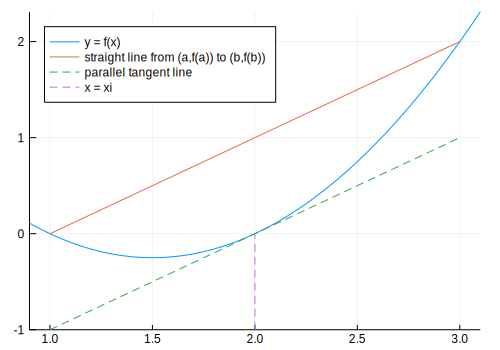

In [3]:
f(x) = 2 - 3x + x^2
g(x) = x - 2
x = 0.9:0.05:3.1
plot(size=(500,350))
plot!(legend=:topleft)
plot!(x, f.(x), label="y = f(x)")
plot!([1,3], [f(1), f(3)], label="straight line from (a,f(a)) to (b,f(b))")
plot!([1,3], [g(1), g(3)], ls=:dash, label="parallel tangent line")
plot!([2,2], [-1,0], ls=:dash, label="x = xi")

**平均値の定理の不等式版:** $f$ は微分可能函数であるとし, $a<b$ であるとする. $a<t<b$ で $|f'(t)|\leqq M$ となっているならば $|f(b)-f(a)|\leqq M|b-a|$ となる.

**証明:** 平均値の定理より, ある実数 $c$ で $f(b)-f(a)=f'(c)(b-a)$, $a<c<b$ を満たすものが存在する. そのとき

$$
|f(b) - f(a)| = |f'(c)||b-a| \leqq M|b-a|. \qquad \QED
$$

平均値の定理はこの不等式版の形式で使われることが多い.

**問題:** $f$ は微分可能函数であるとし, $a<b$ であるとする. $a<t<b$ で $f'(t)=0$ ならば $f(b)=f(a)$ でなることを示せ.

**解答例1:** 平均値の定理より, ある実数 $c$ で $a<c<b$, $f(b)-f(a)\leqq f'(c)(b-a)$ を満たすものが存在する.  $a<t<b$ で $f'(t)=0$ なので $f'(c)=0$ となるので, $f(b)-f(b)=f'(c)(b-a)=0$ である. ゆえに $f(b)=f(a)$ となる. $\QED$

**解答例2:** $a<t<b$ で $|f'(t)|=0$ なので, 平均値の定理(の不等式版)より, $|f(b)-f(a)|\leqq 0|b-a|=0$. ゆえに $f(b)=f(a)$ となる. $\QED$

上の問題の結果は, 導函数が恒等的に $0$ になる微分可能函数は定数函数になることを意味している.

**問題:** $f$, $g$ は区間 $I$ 上の微分可能函数であるとする. 区間 $I$ 上で恒等的に $f'=g'$ ならば $f-g$ は区間 $I$ 上の定数函数になる.

**解答例:** $h=f-g$ とおくと, 区間 $I$ 上で恒等的に $f'=g'$ ならば区間 $I$ 上で恒等的に $h'=0$ となるので, 上の問題の結果より, $h$ は区間 $I$ 上の定数函数になる. $\QED$

### $C^1$ 級函数の積分版平均値の定理

**平均値の定理の積分版:** $a<b$ であるとする. 閉区間 $[a,b]$ 上の $C^1$ 級函数 $f$ について

$$
f(b) - f(a) = \int_a^b f'(t)\,dt.
\qquad\QED
$$

証明についてはノート「<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/09%20integration.ipynb">積分</a>」の<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/09%20integration.ipynb#性質(G)-微分積分学の基本定理2">対応する節</a>を参照せよ.

**注意:** 解析学ユーザー的には $C^1$ 級まで条件を強めても困ることはない. 多くの議論を微分可能性の仮定だけで実行可能なのだが, 導函数が連続函数になるとは限らないので, 議論が技巧的になってしまう傾向がある. そうなることを避けたければ $C^1$ 級まで仮定を強めた方がよい. その場合に利用できる平均値の定理の積分版の式は積分について知っている人ならばみんな知っている公式に過ぎない. $\QED$

**平均値の定理の不等式版:** $f$ は $C^1$ 級函数であるとし, $a<b$ であるとする. $a<t<b$ で $|f'(t)|\leqq M$ となっているならば $|f(b)-f(a)|\leqq M|b-a|$ となる.

**証明:** 
$$
|f(b) - f(a)| = \left|\int_a^b f'(t)\,dt\right|
\leqq \int_a^b|f'(t)|\,dt \leqq \int_a^b M\,dt = M|b-a|.
\qquad\QED
$$

**中間値の定理から導かれる補題:** $a<b$ であるとする. 閉区間 $[a,b]$ 上の実数値連続函数 $g(t)$ に対して, ある実数 $c\in[a,b]$ で

$$
\int_a^b g(t)\,dt = g(c)(b-a)
$$

を満たすものが存在する. (数値例が下の方で計算されている.)

**証明:** $[a,b]$ 上での $g(t)$ の最小値と最大値をそれぞれ $g(\alpha)$, $g(\beta)$ ($\alpha,\beta\in[a,b]$) と書くと, 

$$
\int_a^b g(t)\,dt \geqq \int_a^b g(\alpha)\,dt = g(\alpha)(b-a), \quad
\int_a^b g(t)\,dt \leqq \int_a^b g(\beta)\,dt = g(\beta)(b-a)
$$

より

$$
g(\alpha) \leqq \frac{1}{b-a}\int_a^b g(t)\,dt \leqq g(\beta).
$$

ゆえに, 中間値の定理より, ある実数 $c\in[a,b]$ で

$$
g(c) = \frac{1}{b-a}\int_a^b g(t)\,dt, \quad\text{すなわち}\quad
\int_a^b g(t)\,dt = g(c)(b-a)
$$

を満たすものが存在する. $\QED$

上の中間値の定理から導かれる補題を平均値の定理の積分版に適用すると次が得られる.

**平均値の定理の積分版2:** $a<b$ であるとする. $f$ が $[a,b]$ 上の実数値 $C^1$ 級函数ならば, ある実数 $c\in[a,b]$ が存在して,

$$
f(b) - f(a) = \int_a^b f'(t)\,dt= f(c)(b-a).
\qquad\QED
$$

g(t) = t + 2*sin(t) + 5
S = integrate(g(t), (t, a, b)) = 2*cos(3) - 2*cos(5) + 48
S = N(S) = 45.452690635872656
h(t) = t + 2*sin(t) - 0.681586329484082
c = bisection(h, a, b) = 0.22851790816319195


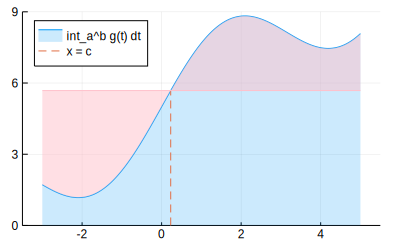

In [4]:
# 中間値の定理の証明に使われる二分法の函数としての実装
function bisection(f, a, b; atol=eps(), maxiter=10^3)
    f(a)*f(b) > 0 && return NaN
    aₙ, bₙ = a, b
    k = 0
    while abs(aₙ - bₙ) > atol
        k > maxiter && return NaN
        c = (aₙ+bₙ)/2
        if f(bₙ)*f(c) ≥ 0
            aₙ, bₙ = aₙ, c
        else
            aₙ, bₙ = c, bₙ
        end
        k += 1
    end
    return (aₙ+bₙ)/2
end

# 中間値の定理から導かれる補題を次の g(x) と a,b に適用してみる.
g(x) = 5 + x + 2sin(x)
a, b = -3, 5
x = a:0.05:b

t = symbols("t", real=true)
@show g(t)
@show S = integrate(g(t), (t,a,b))
@show S = N(S)

h(x) = g(x) - S/(b-a)
@show h(t)
@show c = bisection(h, a, b)

plot(size=(400,250), legend=:topleft)
plot!(xlims=(a-0.5, b+0.5), lims=(0,9))
plot!(x, g.(x), label="int_a^b g(t) dt", fill=(0, 0.2))
plot!([c,c], [0,g(c)], ls=:dash, label="x = c")
plot!(x, fill(g(c), length(x)), fill=(g, 0.5), color=:pink, label="")

### Cauchyの平均値の定理

**Cauchyの平均値の定理:** $f(t)$, $g(t)$ は微分可能函数であるとし, $a<b$ であるとし, $f(b)\ne f(a)$ であると仮定する. このとき, ある実数 $c$ で

$$
\frac{g(b)-g(a)}{f(b)-f(a)} = \frac{g'(c)}{f'(c)}, \quad a<c<b
\tag{$*$}
$$

を満たすものが存在する. $\QED$

この定理はこのノート群では使用しない. Cauchyの平均値の定理については高木貞治『解析概論』の第18節の定理21とその証明を参照せよ.

$(f(t), g(t))$ の描く軌跡は平面上の曲線になる. ($*$) の最初の式の左辺は, 曲線上の点 $(f(a),g(a))$, $(f(b), g(b))$ を通る直線の傾きになる.  その直線を平行移動して曲線に接するようにできる. 接点 $(f(c), g(c))$ における測度ベクトル $(f'(c), g'(c))$ の傾きが ($*$) の最初の式の右辺になる.

**問題:** 図を描いてみよ. $\QED$

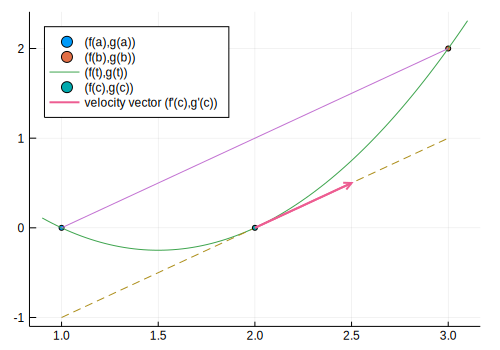

In [5]:
f(t) = t/2
g(t) = 2 - 3t/2 + t^2/4
h(x) = x - 2
t = 1.8:0.05:6.2
plot(size=(500,350))
plot!(legend=:topleft)
scatter!([f(2)], [g(2)], markersize=3, label="(f(a),g(a))")
scatter!([f(6)], [g(6)], markersize=3, label="(f(b),g(b))")
plot!(f.(t), g.(t), label="(f(t),g(t))")
plot!([f(2),f(6)], [g(2), g(6)], label="")
plot!([1,3], [h(1), h(3)], ls=:dash, label="")
scatter!([f(4)], [g(4)], markersize=3, label="(f(c),g(c))")
plot!([2,2.5], [h(2), h(2.5)], line=:arrow, lw=2, label="velocity vector (f'(c),g'(c))")

## 極限の微分・積分の順序交換

一様収束極限と積分の順序交換が可能であることの証明は易しい.  その易しい積分の場合の結果を使って, ある適切な条件を満たす極限と微分の交換可能性を証明しよう.

### 極限と積分の順序交換

**定理:** $a<b$ であるとし, $f_n$ は閉区間 $I=[a,b]$ 上の連続函数の列であり, $I$ 上で一様収束しているならば, その収束先の函数も連続函数になり, 

$$
\lim_{n\to\infty}\int_a^b f_n(x)\,dx = \int_a^b \lim_{n\to\infty}f_n(x)\,dx
$$

が成立している.

**証明:** $f_n$ の収束先の函数を $f$ と書く. ノート「<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/04%20continous%20functions.ipynb">連続函数</a>」で $f$ も連続函数になることはすでに示してある. そして, 閉区間 $[a,b]$ 上のsupノルム $\ds\|g\|_\infty=\sup_{x\in[a,b]}|g(x)|$ について

$$
\|f_n(x)-f(x)\|_\infty \leqq \|f_n-f\|_\infty \quad (x\in[a,b])
$$

であり, $f_n$ が $f$ に一様収束することと $\|f_n(x)-f(x)\|_\infty\to 0$ は同値なので, 

$$
\begin{aligned}
\left|\int_a^b f_n(x)\,dx - \int_a^b f(x)\,dx\right| &=
\left|\int_a^b (f_n(x)-f(x))\,dx\right| \leqq
\int_a^b |f_n(x)-f(x)|\,dx 
\\ &\leqq
(b-a)\|f_n(x)-f(x)\|_\infty \to 0 \quad(n\to\infty).
\end{aligned}
$$

これで, $\ds\lim_{n\to\infty}\int_a^b f_n(x)\,dx = \int_a^b f(x)\,dx$ が示された.

### 極限と微分の順序交換

**定理(極限と微分の順序交換):** $a<b$ であるし, $f_n$ は開区間 $(a,b)$ 上の $C^1$ 級函数の列であり, 開区間 $(a,b)$ に含まれる任意の閉区間 $I$ 上で $f_n$ と $f_n'$ は一様収束していると仮定する(このとき $f_n$, $f_n'$ は**局所一様収束**しているという).  このとき, $f_n$ は開区間 $(a,b)$ 全体で各点収束しており, その収束先の函数も $C^1$ 級になり, 任意の $x\in(a,b)$ において, 

$$
\ds\lim_{n\to\infty}\frac{d}{dx}f_n(x) = \frac{d}{dx}\lim_{n\to\infty}f_n(x)
$$

が成立している. 

**証明:** $x\in(a,b)$ を任意に取り, $a<a'<x<b'<b$ を満たす $a',b'$ を任意に選んで, $I=[a',b']$ とおく. 

$f_n$, $f_n'$ は $I$ 上で一様収束しているので, 特に数列 $f_n(x)$, $f_n'(x)$ も収束している. これで $f_n$, $f_n'$ が開区間 $(a,b)$ 全体で各点収束していることがわかった. $f_n$, $f_n'$ それぞれの各点収束先の函数を $f$, $g$ と書くことにする. 

$f_n$, $f_n'$ は閉区間 $I$ 上でそれぞれ $f$, $g$ に一様収束するので, $f$, $g$ も閉区間 $I$ 上の連続函数になる. 閉区間 $I$ の両端は $a,b$ に幾らでも近付けることができるので, $f$, $g$ は開区間 $(a,b)$ 全体で連続函数になる.

$x_0, x\in (a,b)$ であるとし, $x_0, x\in(a',b')$, $a<a'<b'<a$ を満たす $a',b'$ を任意に選んで, $I=[a',b']$ とおく. $f_n$ は $C^1$ 級なので, 

$$
f_n(x) = f_n(x_0) + \int_{x_0}^x f_n'(\xi)\,d\xi.
$$

$I$ 上で $f_n$ は $f$ に各点収束し, $f_n'$ は $g$ に一様収束するので, $n\to\infty$ のとき, 極限と積分を交換できて,  

$$
f(x) = f(x_0) + \int_{x_0}^x g(\xi)\,d\xi.
$$

を得る. これより, $f'(x)=g(x)$ となることがわかる. $\QED$

**別証明:** $f_n$, $f_n'$ の収束先の函数をそれぞれ $f,g$ と書いて, $f,g$ が連続函数であることを示すところまでは同様.

$x\in(a,b)$ であるとし, $a<a'<x<b'<a$ を満たす $a',b'$ を任意に選んで, $I=[a',b']$ とおく. 以下, 実数 $h$ は $x+h\in I$ を満たしていると仮定する. $\eps>0$ を任意に取る.

$f_n'$ は $I$ 上で $g$ に一様収束するので, ある番号 $N$ が存在して,  $m,n\geqq N$ ならば任意の $\xi\in I$ について

$$
|f_n'(\xi) - g(\xi)| < \frac{\eps}{4}, \quad
|f_m'(\xi) - f_n'(\xi)| \leqq |f_m'(\xi) - g(\xi)|+|g(\xi)-f_n'(\xi)|< \frac{\eps}{2}.
$$

$f_n$ は $C^1$ 級なので

$$
f_n(x+h)-f_n(x)=
\int_x^{x+h} f_n'(\xi)\,\xi =
\int_0^1 f_n'(x+ht)\,dt
$$

となるので, $m,n\geqq N$ のとき, 

$$
\begin{aligned}
|f_m(x+h)-f_m(x) - (f_n(x+h)-f_n(x))| &=
\left|\int_0^1 (f_m'(x+ht)-f_n'(x+ht))\,dt\right|
\\ &\leqq
|h|\sup_{0\leqq t\leqq 1}|f_m'(x+ht)-f_n'(x+ht)| \leqq
|h|\frac{\eps}{2}.
\end{aligned}
$$

$m\to\infty$ とすると, $n\geqq N$ のとき, 

$$
|f(x+h)-f(x)-(f_n(x+h)-f_n(x))| \leqq |h|\frac{\eps}{2}.
$$

以下, $n\geqq N$ と仮定する. $f_n$ は $C^1$ 級函数なので, ある $\delta>0$ が存在して, $|h|<\delta$ ならば

$$
|f_n'(x+ht)-f_n'(x)|<\frac{\eps}{4} \quad(0\leqq t\leqq 1)
$$

となり, 

$$
\begin{aligned}
|f_n(x+h)-f_n(x)-f_n'(x)h|&=
\left|h\int_0^1(f_n'(x+ht)-f_n'(x))\,dt\right|
\\ &\leqq
|h|\sup_{0\leqq t\leqq 1}|f_n'(x+ht)-f_n'(x)| \leqq
|h|\frac{\eps}{4}.
\end{aligned}
$$

したがって, $|h|<\delta$ のとき,

$$
\begin{aligned}
&
|f(x+h)-f(x)-g(x)h| 
\\ &\leqq 
|f(x+h)-f(x)-(f_n(x+h)-f_n(x))| + |f_n(x+h)-f_n(x)-f_n'(x)h| + |f_n'(x)-g(x)||h|
\\ &\leqq
|h|\frac{\eps}{2}+|h|\frac{\eps}{4}+|h|\frac{\eps}{4} = |h|\eps.
\end{aligned}
$$

これで, $f$ は微分可能であり, $f'=g$ となることが示された. $\QED$

以上の別証明については, ラング『現代の解析学』(共立出版, 1981)の第5章§9を参考にした.